In [ ]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

alr4 = importr('alr4')
print("alr4 package imported successfully.")

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


alr4 package imported successfully.


# Problem 6

**Explanation of Problem 6: Sex Discrimination (Data file: salary)**

- Problem 6 is a multiple linear regression. 
- The exercise focused on analyzing potential sex discrimination in the salaries of faculty at a small Midwestern college.
- The goal is to use regression analysis to model <u>academic salary</u> based on several <u>faculty characteristics</u> and to investigate if there is a statistically <u>significant difference in salaries between males and females</u>

In [2]:
# load the salary data from the alr4 package
ro.r['data']('salary', package='alr4')

with localconverter(ro.default_converter + pandas2ri.converter):
    salary_df = ro.r['salary']

print(salary_df.head())
# print(salary_df.info())

    degree  rank     sex  year  ysdeg  salary
1  Masters  Prof    Male    25     35   36350
2  Masters  Prof    Male    13     22   35350
3  Masters  Prof    Male    10     23   28200
4  Masters  Prof  Female     7     27   26775
5      PhD  Prof    Male    19     30   33696


In [3]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 1 to 52
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   degree  52 non-null     category
 1   rank    52 non-null     category
 2   sex     52 non-null     category
 3   year    52 non-null     int32   
 4   ysdeg   52 non-null     int32   
 5   salary  52 non-null     int32   
dtypes: category(3), int32(3)
memory usage: 1.5+ KB


The data set, salary, includes the following variables:
 - `salary`: Academic year salary in dollars (Response variable).
 - `sex`: A factor with levels Male and Female.   
 - `degree`: Highest degree (e.g., Masters, PhD).
 - `rank`: Faculty rank (e.g., Prof).
 - `year`: Years in the current rank.
 - `ysdeg`: Years since highest degree.

## 1. Get appropriate graphical summaries of the data and discuss the graphs.

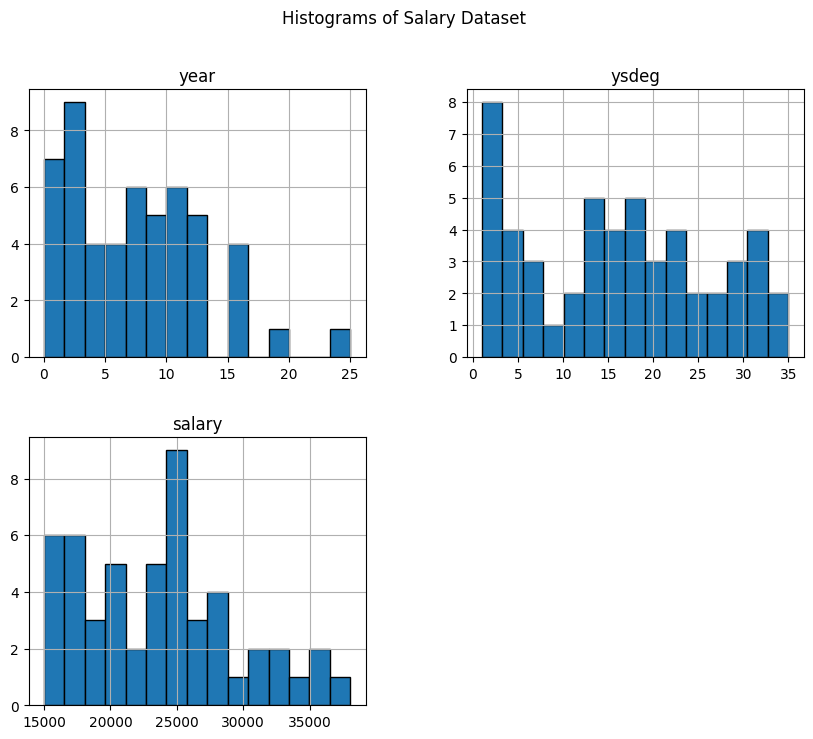

In [4]:
salary_df.hist(bins=15, figsize=(10, 8), edgecolor='black')
plt.suptitle("Histograms of Salary Dataset")
plt.show()

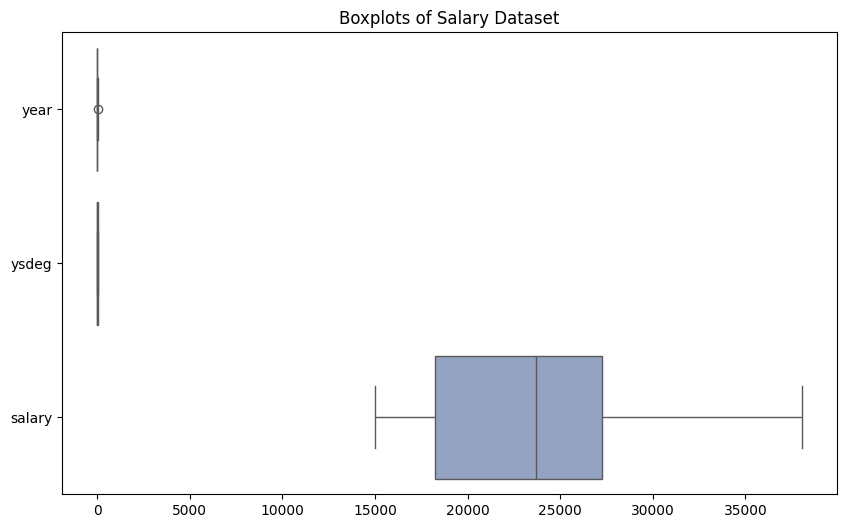

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df, orient='h', palette='Set2')
plt.title("Boxplots of Salary Dataset")
plt.show()

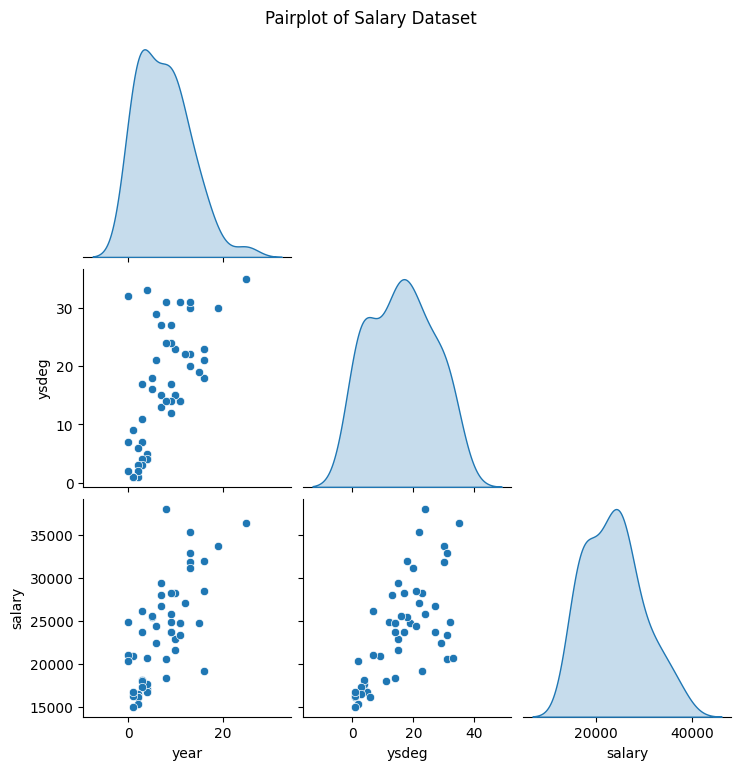

In [6]:
sns.pairplot(salary_df, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Salary Dataset", y=1.02)
plt.show()

## 2. Test the hypothesis that the mean salary for men and women is the same. What alternative hypothesis do you think is appropriate?

Hypotheses:
Null Hypothesis (H₀): The mean salary for men and women is the same.

$H_0: \mu_{\text{Male}} = \mu_{\text{Female}}$

Alternative Hypothesis (H₁): The mean salary for men and women is different.

$H_1: \mu_{\text{Male}} \neq \mu_{\text{Female}}$

Alternatively, if you suspect that one gender earns more than the other, you can use a one-tailed test:

$H_1: \mu_{\text{Male}} > \mu_{\text{Female}}$ (if you suspect men earn more)

$H_1: \mu_{\text{Male}} < \mu_{\text{Female}}$ (if you suspect women earn more)

In [7]:
# Separate the salaries by gender
male_salaries = salary_df[salary_df['sex'] == 'Male']['salary']
female_salaries = salary_df[salary_df['sex'] == 'Female']['salary']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(male_salaries, female_salaries, equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean salaries between men and women.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean salaries between men and women.")

T-statistic: 1.7744380049367063
P-value: 0.09009405709468926
Fail to reject the null hypothesis: No significant difference in mean salaries between men and women.


## 3. Assuming no interactions between sex and the other predictors, obtain a 95% confidence interval for the difference in salary between males and females.

In [16]:
# Ensure 'sex' is a categorical variable
salary_df['sex'] = salary_df['sex'].astype('category')

# Optional: Set 'Female' as the reference level
salary_df['sex'] = salary_df['sex'].cat.reorder_categories(['Female', 'Male'], ordered=True)

# Fit a linear regression model with salary as the response and sex as the predictor
model = smf.ols('salary ~ sex', data=salary_df).fit()

# Get the confidence interval for the coefficient of sex
conf_int = model.conf_int(alpha=0.05)  # 95% confidence interval
print(conf_int)  # Debug: Inspect the confidence intervals to find the correct label

# Adjust the label based on the output of conf_int
sex_diff_ci = conf_int.loc['sex[T.Male]']  # Update this if the label differs

# Print the results
print("95% Confidence Interval for the difference in salary between males and females:")
print(sex_diff_ci)

                        0             1
Intercept    18253.263379  24461.022335
sex[T.Male]   -291.257020   6970.550253
95% Confidence Interval for the difference in salary between males and females:
0    -291.257020
1    6970.550253
Name: sex[T.Male], dtype: float64


## 4. Model Re-evaluation (Excluding rank)

In [17]:
# Fit a linear regression model excluding the variable 'rank'
model_no_rank = smf.ols('salary ~ sex + degree + year + ysdeg', data=salary_df).fit()

# Summarize the model
print(model_no_rank.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     20.11
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           1.05e-09
Time:                        01:12:09   Log-Likelihood:                -499.00
No. Observations:                  52   AIC:                             1008.
Df Residuals:                      47   BIC:                             1018.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.59e+04   1259.866     12.618